In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Step 2: Load the Iris Dataset
# Replace this path with the correct path where your Iris.csv file is located
file_path = 'Iris.csv'  # Change this to your file path if needed
iris = pd.read_csv(file_path)

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Step 3: Inspect the Data
print("First 5 Rows of the Iris Dataset:")
print(iris.head())

First 5 Rows of the Iris Dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Step 4: Data Preprocessing
# Check for missing values
print("\nMissing Values in Each Column:")
print(iris.isnull().sum())

# Remove the 'Id' column as it's not useful for clustering
iris = iris.drop('Id', axis=1)

# Standardize the feature columns (important for clustering)
X = iris.drop('Species', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing Values in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


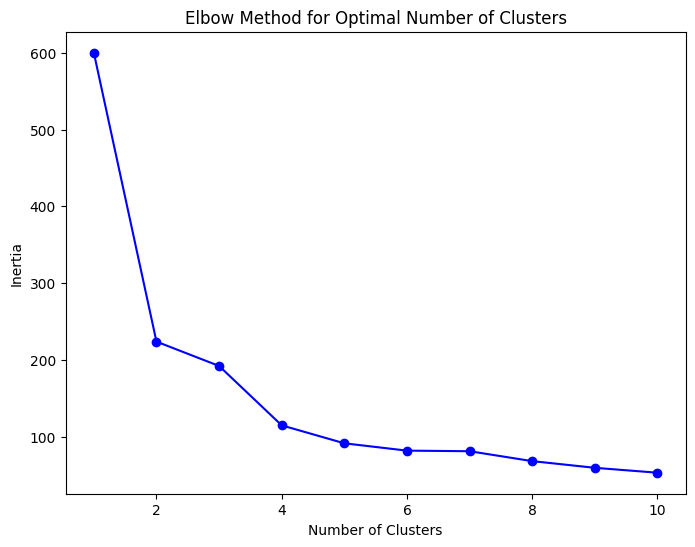

In [6]:
# Step 5: Elbow Method to Find the Optimal Number of Clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [7]:
# Step 6: Apply K-Means Clustering
# Based on the Elbow Method, let's choose the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
iris['Cluster'] = kmeans.fit_predict(X_scaled)

In [8]:
# Step 7: Evaluate the Clustering Results
# Add the predicted cluster labels to the original dataset
print("\nCluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]


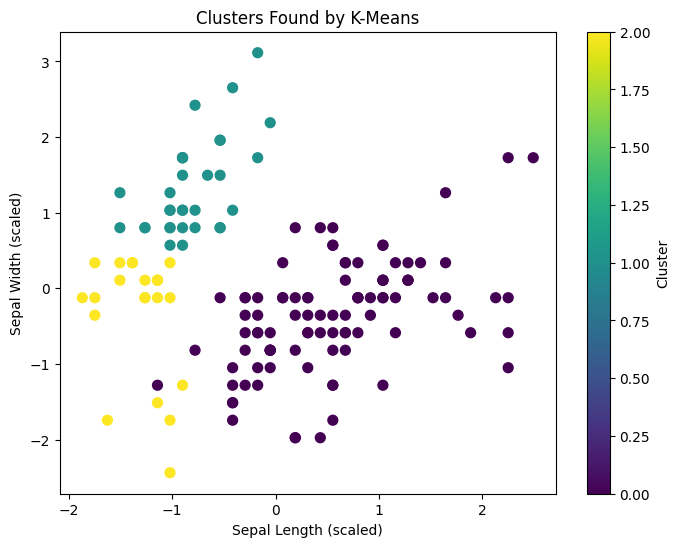

In [9]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris['Cluster'], cmap='viridis', s=50)
plt.title("Clusters Found by K-Means")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.colorbar(label="Cluster")
plt.show()

In [10]:
# Step 8: Evaluate Clustering with Silhouette Score
sil_score = silhouette_score(X_scaled, iris['Cluster'])
print(f"\nSilhouette Score: {sil_score:.3f}")


Silhouette Score: 0.479
